In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from ast import literal_eval
from typing import Optional

data = Path("../data")
plot_path = data / "plots"

## Character traits

In [2]:
dfChar = pd.read_csv(data / "Anime_Traits.csv")
dfChar

,Id,Names,Hair_Color,Gender,Tags,Anime,Manga
0,0,L,Black Hair,Male,"['Analytical', 'Barefoot', 'Detective', 'Eye B...","['Death Note', 'Death Note Rewrite 1: Visions ...","['Death Note', 'Death Note: L Change the World..."
1,1,Kakashi HATAKE,Grey Hair,Male,"['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...","['Boruto: Naruto Next Generations', 'Boruto: N...",['Boruto: Naruto the Movie Tokubetsu Bangai-he...
2,2,Edward ELRIC,Blonde Hair,Male,"['Alchemist', 'Arm Blades', 'Artificial Limb',...","['Fullmetal Alchemist', 'Fullmetal Alchemist: ...","['Fullmetal Alchemist', 'Fullmetal Alchemist G..."
3,3,Levi,Black Hair,Male,"['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...","['Attack on Skytree', 'Attack on Titan', 'Atta...","['Attack on Titan', 'Attack on Titan: Junior H..."
4,4,Light YAGAMI,Brown Hair,Male,"['Analytical', 'Big Ego', 'Charismatic', 'God ...","['Death Note', 'Death Note Rewrite 1: Visions ...",['Death Note']
...,...,...,...,...,...,...,...
119820,123369,Narrator,NaN,Male,['Gold Lightan: Golden Warrior'],NaN,NaN
119821,123370,Aoi,Purple Hair,Female,"['Editor', 'Hair Antenna']",['Kemeko Deluxe!'],['Kemeko DX!']
119822,123371,Kiriko,Black Hair,Female,"['Eye Patch', 'Robot', 'Rosy Cheeks']",['Kemeko Deluxe!'],['Kemeko DX!']
119823,123372,Ryouta MINAMINO,Blonde Hair,Male,"['Anti-Gravity Hair', 'Glasses', 'Headband']",['Kemeko Deluxe!'],['Kemeko DX!']


In [3]:
dfChar["Id"].nunique()

119824

In [4]:
dfChar["Gender"].value_counts()

Male                                          62063
Female                                        51143
Female General and Eldest Princess (Novel)        2
Return of the Female Knight (Novel)               1
I Met the Male Lead in Prison (Promo)             1
My Raw Love Life with a Male Demon                1
110115                                            1
Name: Gender, dtype: int64

In [5]:
dfGender = dfChar[["Gender","Names"]].groupby("Gender").count().reset_index()

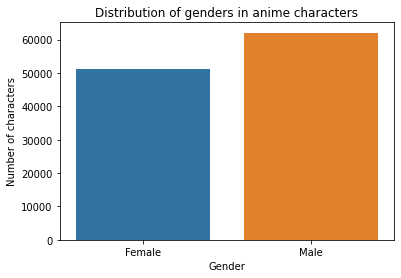

In [6]:
plot = sns.barplot(data = dfGender[dfGender["Names"] > 10], x = "Gender", y= "Names")
plt.title("Distribution of genders in anime characters")
plt.ylabel("Number of characters")

plot.figure.set_facecolor("white")
plot.get_figure().savefig(plot_path / "anime_characters_genders.png")

In [7]:
dfChar = dfChar[["Names","Tags"]]
dfChar.dropna(inplace=True)

/tmp/ipykernel_35033/3572015977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChar.dropna(inplace=True)


In [8]:
def safe_literal_eval(node) -> Optional[str]:
     try:
         return literal_eval(node)
     except ValueError:
         return None

In [9]:
dfChar["Tags"] = dfChar["Tags"].apply(safe_literal_eval)
dfChar = dfChar.explode("Tags")

/tmp/ipykernel_35033/323165707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChar["Tags"] = dfChar["Tags"].apply(safe_literal_eval)


In [10]:
dfChar.head(5)

,Names,Tags
0,L,Analytical
0,L,Barefoot
0,L,Detective
0,L,Eye Bags
0,L,Sweet Tooth


In [11]:
dfChar = dfChar.groupby('Tags').count()
dfChar.reset_index(inplace=True)
dfChar.head(5)

,Tags,Names
0,"""Anata wo Hitokoto de Arawashite Kudasai"" no S...",2
1,"""Aoi"" - Hikaru ga Chikyuu ni Itakoro......",4
2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",2
3,"""Bungaku Shoujo"" Memoire",6
4,"""Bungaku Shoujo"" Movie",4


In [12]:
test = dfChar[dfChar["Names"] > 2000]
test = test.rename(columns={"Names" : "Count"})
test.sort_values(by=['Count'], ascending=False,inplace=True)
test = test[(test["Tags"] != "Ponytail") & (test["Tags"] != "Hat") & (test["Tags"] != "Pointy Ears") & (test["Tags"] != "Hair Ribbons") & (test["Tags"] != "Hair Antenna") & (test["Tags"] != "Headband") & (test["Tags"] != "Pigtails")]
test.head(10)

,Tags,Count
252,Adult,22405
7713,Teenager,19875
3315,High School Student,12919
2854,Glasses,8992
2319,Facial Hair,8807
4758,Magic User,5559
7559,Sword Fighter,3920
1347,Child,3800
658,Athlete,3772
5068,Military,3643


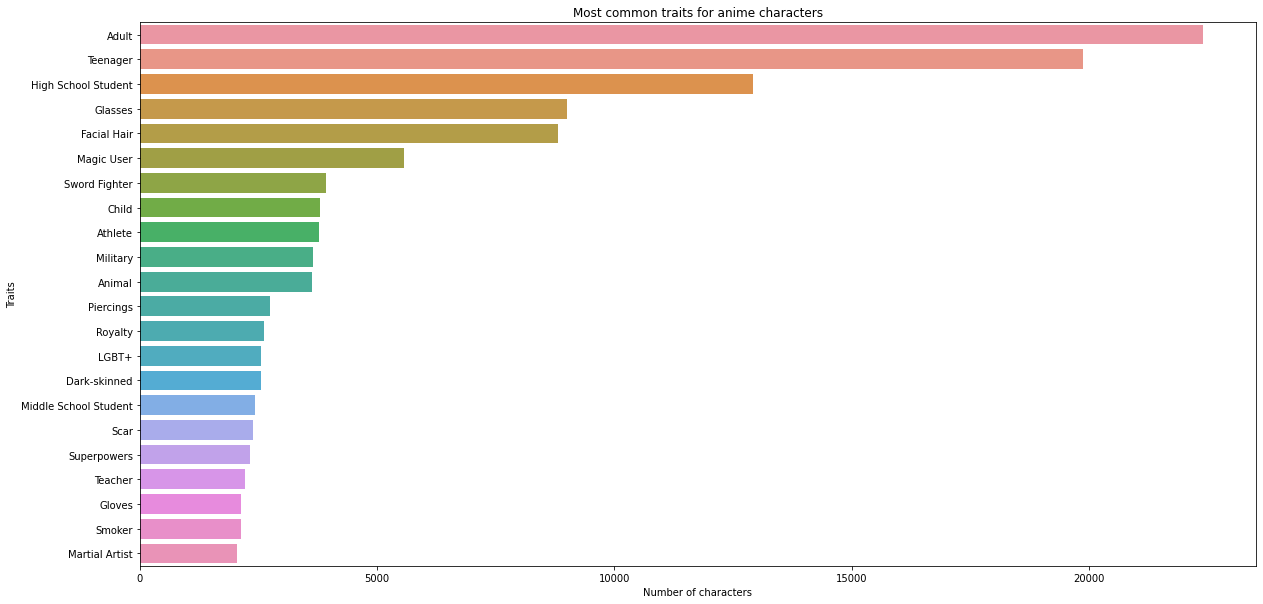

In [13]:
plt.figure(figsize=(20,10))
plot = sns.barplot(data = test, y = "Tags", x = "Count")
plt.title("Most common traits for anime characters")
plt.xlabel("Number of characters")
plt.ylabel("Traits")


# Set the background color to white
plot.figure.set_facecolor('white')
plt.show()

plot.get_figure().savefig(plot_path / "anime_characters_traits.png")